<a href="https://colab.research.google.com/github/subh-775/Academicia/blob/main/4.Vector_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Tokens for a sample text

In [ ]:
import re # regular-expression library
text=" hello world. This, is a -- test?."
result=re.split(r'(\s)', text)  #(\s): wherever white-space is encounters it split the text from that.
print(result)

['', ' ', 'hello', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', '--', ' ', 'test?.']


In [ ]:
# if we want to include characters like , and . as a seperate token, we can do
a="hello world. This, is a-- test?."
result=re.split(r'([:;,.?]|\s|--)',a)
print(result)

['hello', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', '--', '', ' ', 'test', '?', '', '.', '']


In [ ]:
# whitespace will not be returned
result=[item for item in result if item.strip()]
print(result)

['hello', 'world', '.', 'This', ',', 'is', 'a', '--', 'test', '?', '.']


# Level 1: Tokenization

## understanding tokenization through a sample data: the-verdict.txt

In [ ]:
with open("the-verdict.txt", 'r', encoding="utf-8") as f:
  raw_text=f.read()

print("Total number of character: ", len(raw_text))
print(raw_text)

Total number of character:  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its li

removal of whitespaces reduce memory requirements. However, if we want to train models which are sensitive to space and indentation(python-codes), we need to pay attention to spaces as well.



In [ ]:
# If we want to remove any to tokenise other characters like [!,.?+=--_"]..etc we can go like
# result=re.split(r'([.:;"_?,)]|--|[\s]',raw_text)
import re
preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',raw_text) # closing the unclosed parenthesis. removing extra square brackets around \s as it's already a character class.
preprocessed=[item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'think', 'of', 'that', ',

In this way we've succesfully converted a short story into individual tokens using re

# Step 2: Creating Token ID's

In [ ]:
print(len(preprocessed))

4690


In [ ]:
all_words=sorted(set(preprocessed))
vocab_size=len(all_words)
print(vocab_size)

1130


The vocbabulary is like the dictionary where every token(word) is mapped to a integer ID


In [ ]:
vocab ={token:integer for integer, token in enumerate(all_words)}

In [ ]:
for i, item in enumerate(vocab.items()):
  print(item)
  if i>=50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In this we've succesfully **encoded** our input text into tokens, and assigned a unique token id to it

## SimpleTokenizer V1 class


In [ ]:
class SimpleTokenizerV1:
  def __init__(self,vocab):
    self.str_to_int=vocab
    # Calling vocab.items() to get the iterable key-value pairs
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed=[
        item.strip() for item in preprocessed if item.strip()
    ]
    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    # Replace spaces beforethe specified punctuations
    text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)
text= """"It's the last he painted, you know,"
          Mrs. Gisburn said with pardonable pride."""

In [ ]:
ids=tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

<div class = "alert alert-success alert-info">
    hence the encode and decode functions are working correctly
</div>

Since the provided text is from "the-vedict.txt" book hence the function encoded and decoded it succesfully.
But, when we provide it new input(which is not from the book), it will result in error.
Hence LLms are trained on vast amount of large data along with a technique called as : SPECIAL CONTEXT TOKENS" so that these kind of error can not occur.

# SimpleTokenizerV2

In [ ]:
class SimpleTokenizerV2:
  def __init__(self,vocab):
    self.str_to_int=vocab
    # Adding <|unk|> to the vocab if it's not present:
    if "<|unk|>" not in self.str_to_int:
      self.str_to_int["<|unk|>"] = len(self.str_to_int)
    # Calling vocab.items() to get the iterable key-value pairs
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed=[item.strip() for item in preprocessed if item.strip()]
    preprocessed=[
        item if item in self.str_to_int
        else "<|unk|>" for item in preprocessed
    ]
    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    # Replace spaces beforethe specified punctuations
    text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [ ]:
tk= SimpleTokenizerV2(vocab)
text1=" hello there! How are You?"
text2="In the sunlit terraces of the palace."
text=" <|endoftext|> ".join((text1,text2))
print(text)

 hello there! How are You? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
ides=tk.encode(text)
print(ides)

[1130, 992, 0, 52, 169, 113, 10, 1130, 55, 988, 956, 984, 722, 988, 1130, 7]


In [ ]:
tk.decode(ides)

'<|unk|> there! How are You? <|unk|> In the sunlit terraces of the <|unk|>.'

The **<|unk|>**  are the unknown characters which are not present in the vocab.
In the above output after decoding we are getting unknown for "hello" and "there", since they are not present in the verdict book, hence in this way we can handle **<|unk|>** characters instead of getting error.

# Level 2 : Byte Pair encoding

```mermaid
flowchart LR
    B["Tokenization Algorithms"]

    subgraph W["Word-based Tokenization"]
        W1["Example: ['My','hobby','is','playing','cricket']"]
        W2["Advantage: Full words, intuitive"]
        W3["Disadvantage: OOV issues for unseen words"]
    end

    subgraph S["Sub-word-based Tokenization"]
        S1["Example: 'boys' → ['boy','s']"]
        S2["Advantage: Fewer OOV, handles morphological variations"]
        S3["Disadvantage: Might split frequent words unnecessarily if not tuned well"]
    end

    subgraph C["Character-based Tokenization"]
        C1["Example: ['M','y','h','o','b','b','y']"]
        C2["Advantage: No OOV problem, every character recognized"]
        C3["Disadvantage: Word meaning is lost; token sequence is longer"]
    end

    B --> W
    B --> S
    B --> C
```


<div class="alert alert-info">
    The Byte Pair Encoding is a type of sub-word based tokenization algorithm. In this algorithm the **most common pair of         consecutive bytes of data** is replaced with a byte that does not occur in data.
</div>

The BPE algorithm was used to train models like GPT-2, GPT-3 and the original model used in ChatGPT

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:00


In [ ]:
import importlib
import tiktoken

print("tiktoken version: ", importlib.metadata.version("tiktoken"))

tiktoken version:  0.9.0


## Tiktoken is based on subword based tokenization algorithm

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

<div class="alert alert-info alert-success">
    The usage of this tokenizer is simple to SimpleTokenizer V2 we implemented previously via an encode method:
</div>

In [ ]:
test = (
    "Hello, do you like tea? <|endoftext|> In the Unlit terraces/"
    "of someunknownPlace."
)

integers = tokenizer.encode(test, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 791, 18250, 8812, 2114, 14, 1659, 617, 34680, 27271, 13]


In [ ]:
strings=tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the Unlit terraces/of someunknownPlace.


In [ ]:
axer="someunknown"
numeric=tokenizer.encode(axer, allowed_special={"<|endoftext|>"})
print(numeric)

[11246, 34680]


<div class="alert alert-info">
The <|endoftext> token is assigned to a relatively large token ID, namely 50526
</div>

**Let us take another simple example to illustrate how the BPE tokenizer deals with unknown tokens**

In [ ]:
newint = tokenizer.encode("chala ja <endoftext>")
print("encoded seq: ", newint)

newstr = tokenizer.decode(newint)
print("Provided text: ", newstr)

encoded seq:  [354, 6081, 45091, 1279, 437, 1659, 5239, 29]
Provided text:  chala ja <endoftext>


# Level 3 : Creating Input-Output Pairs

<div class="alert alert-info">
    Context-Length: determines how many tokens are included in the input.
</div>
<div class="alert alert-success">
    Output-Length : here is one word at a time.
</div>

<div class="alert alert-danger">
    Self- supervised learning is actually Unsupervised learning, because we   are making an input-output pair using the auto-regressive behaviour, for example see the below table.
    </div>

| Input Text                              | Target Word |
|-----------------------------------------|-----------|
| LLMs                                    | learn     |
| LLMs learn                              | to        |
| LLMs learn to                           | predict   |
| LLMs learn to predict                   | one       |
| LLMs learn to predict one               | word      |
| LLMs learn to predict one word          | at        |
| LLMs learn to predict one word at       | a         |
| LLMs learn to predict one word at a     | time      |


In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text=f.read()

enc_text=tokenizer.encode(raw_text)
print(len(raw_text))
print(len(enc_text))

20479
5145


In [ ]:
enc_sample=enc_text[50:]

In [ ]:
context_size=4
# the input x is the first 4 tokens [1,2,3,4] and the target y is the next 4 tokens [2,3,4,5]
x = enc_sample[:context_size] #1,2,3,4
y= enc_sample[1:context_size+1] # 2,3,4,5

print("X : ",x)
print(f"y:        {y}")

X :  [290, 4920, 2241, 287]
y:        [4920, 2241, 287, 257]


In [ ]:
# Encoded characters input-target pairing
for i in range(1, context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]
    print(context, "--->",desired)

[290] ---> 4920
[290, 4920] ---> 2241
[290, 4920, 2241] ---> 287
[290, 4920, 2241, 287] ---> 257


In [ ]:
## Decoded characters input-target pairing
for i in range(1, context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]
    print(tokenizer.decode(context), "--->",tokenizer.decode([desired]))

 and --->  established
 and established --->  himself
 and established himself --->  in
 and established himself in --->  a


<div class="alert alert-warning">

Hence, we've now created the input-target pairs that we can turn into use for the LLM training in upcoming chapters. </div>

<div class="alert alert-danger">
There's only one more task before we can turn the tokens into embeddings: implementing an efficient data loader that iterates over the input dataset and returns the input and targets as PyTorch tensors, which can be thought of as multidimensional arrays.
    
</div>

<div class="alert alert-warning">
    In particular, we are interested in returning two tensors: an input tensor containing the text that the LLM sees and a target tensor that includes the targets for the LLms to predict.
</div>

### Sample Text:
*"In the heart of the city stood the old library, a relic from a bygone era. Its stone walls bore the marks of time, and ivy clung tightly to its facade ..."*

#### 📌 Tensor Representation

#### 🔹 **Tensor containing the inputs (`x`)**
```python
x = tensor([
    ["In", "the", "heart", "of"],
    ["the", "city", "stood", "the"],
    ["old", "library", ",", "a"],
    ...
])

y = tensor([
    ["the", "heart", "of", "the"],
    ["city", "stood", "the", "old"],
    ["library", "a", "relic", "from"],
    ...
])





<div class="alert alert-info">
    To implement efficient dataloaders, we collect inputs in a tensor x, where each row represents one input context. the second tensor y contains the corresponding prediction targets(next words), which are created by shifting the input by one position.
</div>

# Level 4: Implementing a Data Loader

<div class="alert alert-info">

Step 1: Tokenize the entire text.

Step 2: Use a sliding window to chunk the book into overlapping sequences of max_length.

Step 3: Return the total number of rows in the dataset.

Step 4: Return a single row from the dataset.
</div>

In [ ]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the text into overlapping sequences
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

<div class="alert alert-success">
The following code will use the GPTDatasetV1 to load the inputs in batches via a PyTorch DataLoader:
</div>

<div class="alert alert-info">
    
Step 1: Initialize the tokenizer.
    
Step 2: Create dataset.

Step 3: drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training.


Step 4: The number of CPU processes to use for preprocessing.</div>

In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    # Initialize the tokenizer
    tokenizer = tiktoken.encoding_for_model("gpt-2")  # Fixed tokenizer initialization

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create DataLoader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

<div class="alert alert-success">
    Let's test the dataloader with a batch size of 1 for an LLM with a context size of 4, This will develop an intuition of how the GPTDatasetV1 class and the create_dataloader_v1 function work together:
</div>

In [ ]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text=f.read()

In [ ]:
import torch
print("PyTorch version: ", torch.__version__)

# Create DataLoader
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

# Fetch first batch
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version:  2.6.0+cu124
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


<div class="alert alert-danger">
The below is what is stride parameter
</div>

Stride = 1


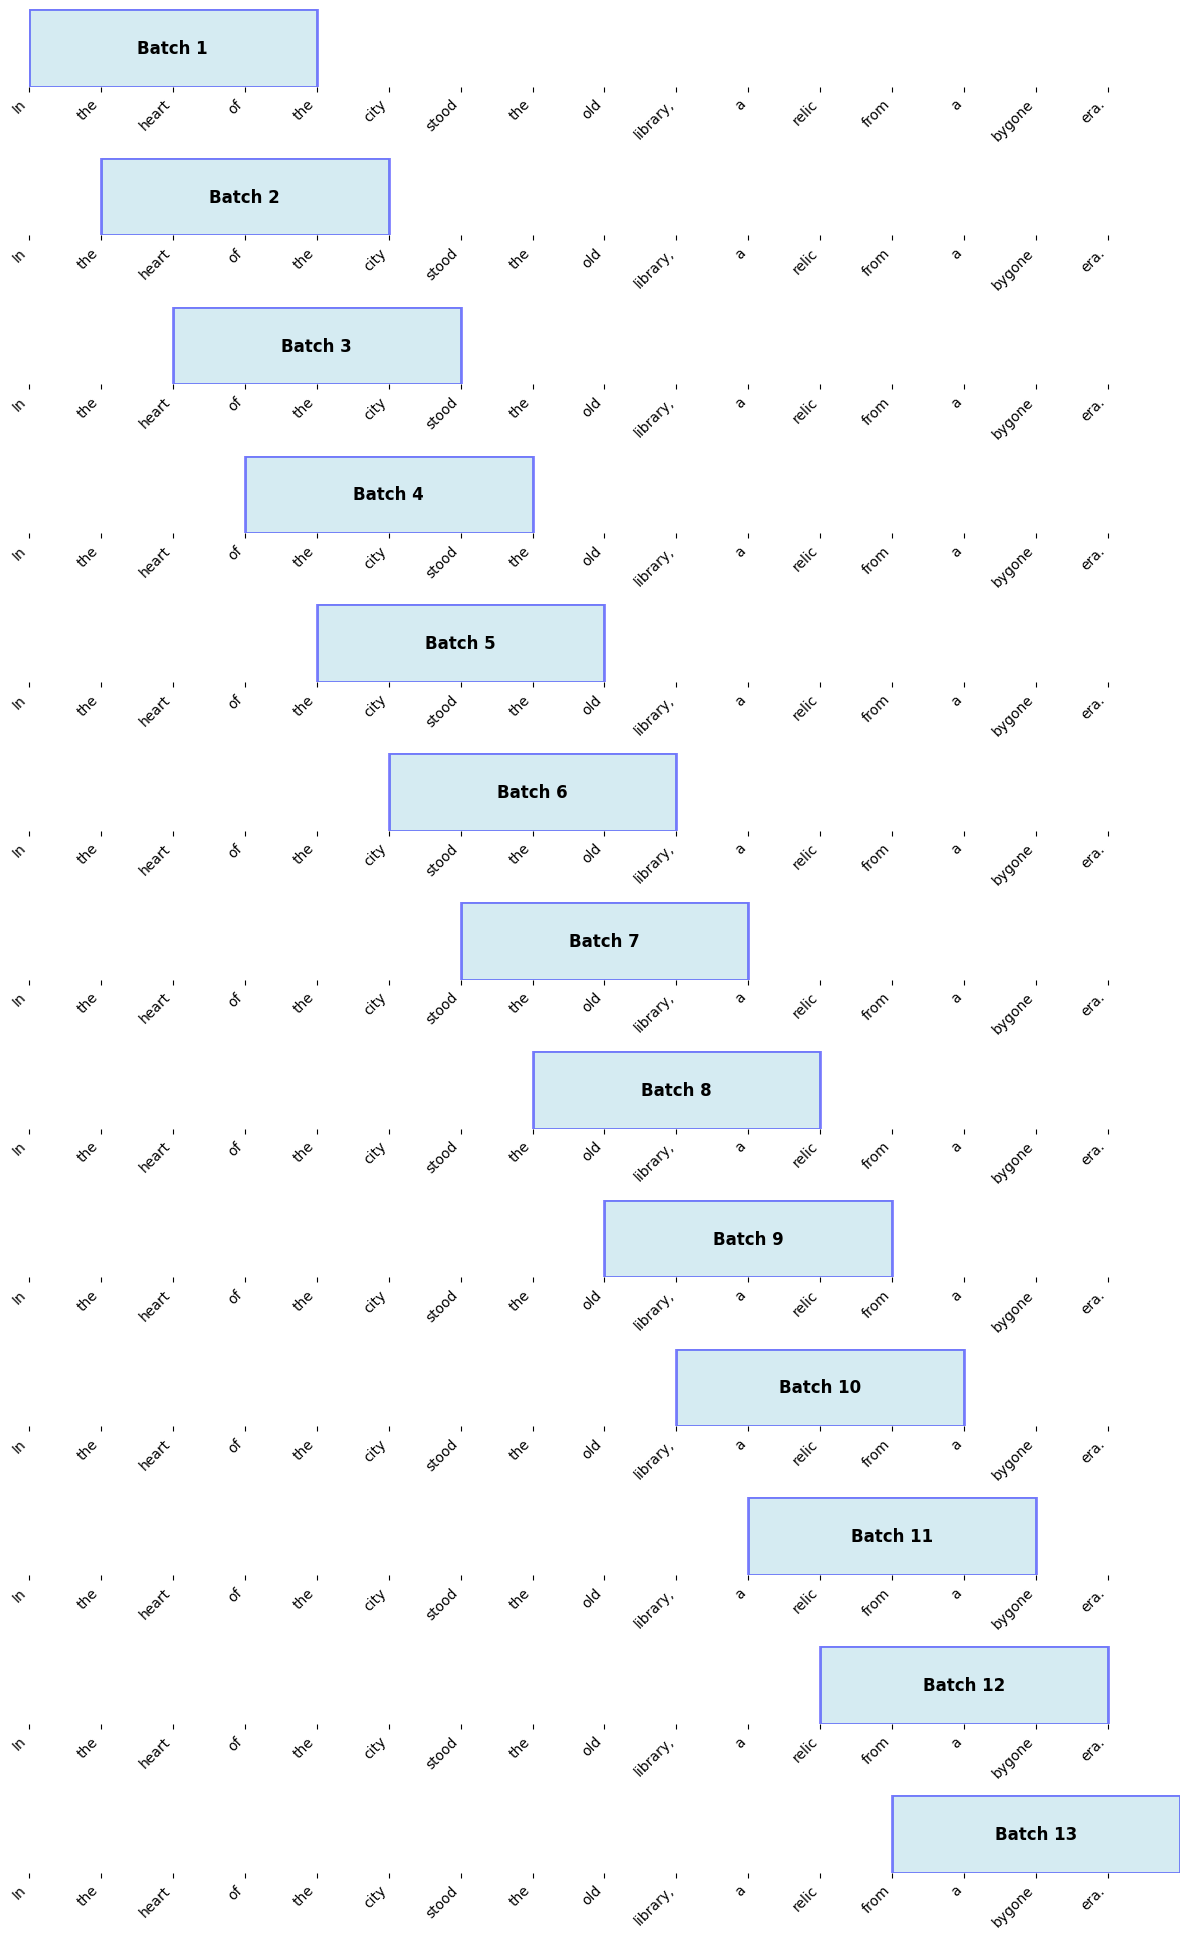

Stride = 4


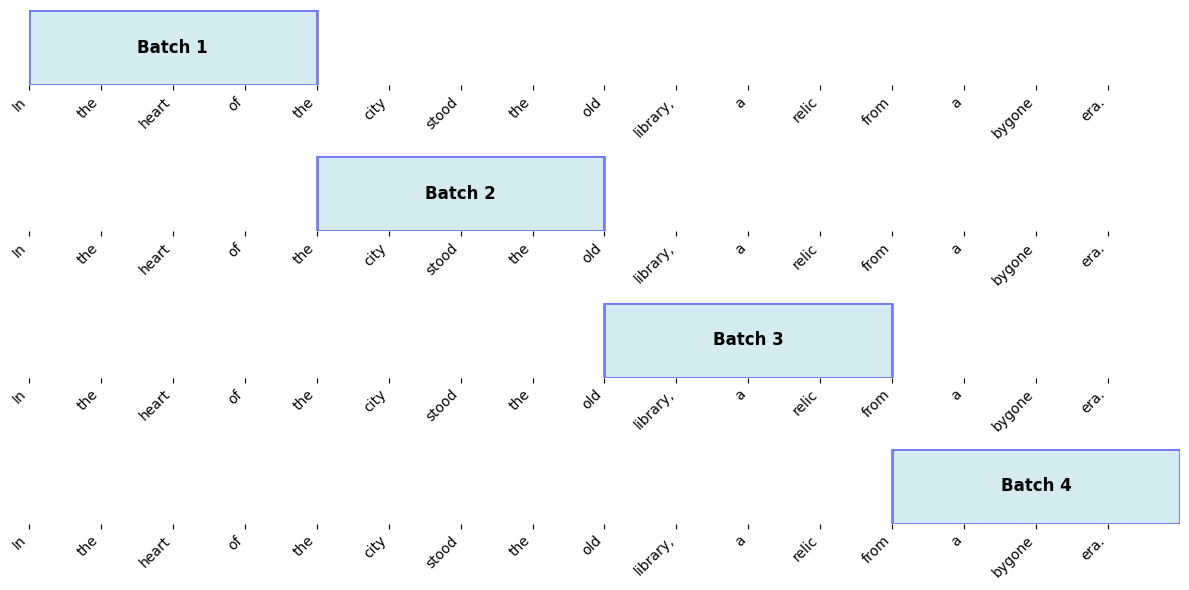

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_stride(text, max_length=4, stride=1):
    """Visualizes how input sequences shift with different stride values."""
    words = text.split()
    num_batches = (len(words) - max_length) // stride + 1

    fig, axes = plt.subplots(num_batches, 1, figsize=(12, num_batches * 1.5))

    for i in range(num_batches):
        ax = axes[i] if num_batches > 1 else axes
        ax.set_xlim(0, len(words))
        ax.set_ylim(0, 1)
        ax.set_xticks(range(len(words)))
        ax.set_xticklabels(words, rotation=45, ha="right", fontsize=10)
        ax.set_yticks([])
        ax.set_frame_on(False)

        start_idx = i * stride
        end_idx = start_idx + max_length
        rect = patches.Rectangle((start_idx, 0), max_length, 1, linewidth=2, edgecolor='blue', facecolor='lightblue', alpha=0.5)
        ax.add_patch(rect)

        # Annotate batch
        ax.text(start_idx + max_length / 2, 0.5, f'Batch {i+1}', fontsize=12, va='center', ha='center', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Example text
sample_text = "In the heart of the city stood the old library, a relic from a bygone era."

# Visualize different stride values
print("Stride = 1")
visualize_stride(sample_text, max_length=4, stride=1)

print("Stride = 4")
visualize_stride(sample_text, max_length=4, stride=4)

In [ ]:
print("Second batch : ", next(data_iter))  # we have stride=1

Second batch :  [tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [ ]:
print("Third batch: ", next(data_iter)) # Autoregressive behaviour

Third batch:  [tensor([[2885, 1464, 1807, 3619]]), tensor([[1464, 1807, 3619,  402]])]


<div class="alert alert-info">
If we compare the first and second batch, we can see that the second's batch token ID's are shifted y one position compared to the first batch.

The stride setting dictates the number of positions of the inputs shift across batches, emulating a sliding window approach.
</div>

In [ ]:
#effect of batch sizes
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter=iter(dataloader)
inputs, targets= next(data_iter)
print("Inputs:\n", inputs)
print("Outputs:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Outputs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


<div class="alert alert-danger">
 Since we've set stride=4, which has not overlapping between the words, this helps prevent overfitting
 </div>

In [ ]:
#for batch_size=3
dataloader = create_dataloader_v1(raw_text, batch_size=3, max_length=4, stride=4, shuffle=False)

data_iter=iter(dataloader)
inputs, targets= next(data_iter)
print("Inputs:\n", inputs)
print("Outputs:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026]])
Outputs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632]])


# Level 5 : Token/ Vector Embeddings

<div class="alert alert-success">
calling it word embeddings will not be good coz, token can be words, subwords, or characters, hence token is a broader term
</div>

```mermaid
graph TD;
    A["Input Text: This is an example"] --> B["Step 1: Tokenization"]
    B --> C["Tokenized Text: ['This', 'is', 'an', 'example']"]
    C --> D["Step 2: Convert to Token IDs"]
    D --> E["Token IDs: [4013, 201, 302, 1134]"]
    E --> F["Step 3: Token Embeddings"]
    F --> G["Embeddings passed to GPT model"]


In [ ]:
!pip install huggingface_hub gensim==4.3.0
!pip install numpy --upgrade --force-reinstall
!pip install numpy==1.26.0 --upgrade --force-reinstall

# !pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.0

!pip uninstall -y numpy scipy gensim

!pip install --upgrade --force-reinstall \
  "numpy==1.23.5" \
  "scipy==1.10.1" \
  "gensim==4.3.0" \
  "huggingface_hub==0.15.1"

In [ ]:
# !pip uninstall -y numpy scipy gensim

# !pip install --upgrade --force-reinstall \
#   numpy==1.23.5 \
#   scipy==1.10.1 \
#   gensim==4.3.0 \
#   huggingface_hub==0.15.1

In [2]:
from huggingface_hub import hf_hub_download
import gensim.downloader as api
model=api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
word_vectors=model

#let us look how the vector embedding of a word looks like
print(word_vectors['computer'])

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [9]:
print(word_vectors['car'].shape)  #300 dimesnional vector

(300,)


In [10]:
# let us look at how it captures semantic realtion between king+woman-man=?


#Example of using most_similar
print(word_vectors.most_similar(positive=['song', 'singer'], negative=['man']))

[('songs', 0.7155179977416992), ('album', 0.6266804337501526), ('lyrics', 0.6251981258392334), ('ballad', 0.612213134765625), ('vocalist', 0.604699432849884), ('duet', 0.5973033905029297), ('Patsy_Cline_Crazy', 0.5878743529319763), ('Oasis_Wonderwall', 0.58250492811203), ('Eva_Cassidy', 0.5824200510978699), ('Madeline_Peyroux', 0.581369936466217)]


In [12]:
# let us look at similarity between two different words
print(word_vectors.similarity('cat', 'dog')* 100)
print(word_vectors.similarity('woman', 'man')*100)
print(word_vectors.similarity('man', 'man')*100)
print(word_vectors.similarity('nephew', 'niece')*100)
print(word_vectors.similarity('bat', 'ball')*100)
print(word_vectors.similarity('stone', 'water')*100)
print(word_vectors.similarity('uncle', 'sister')*100)
print(word_vectors.similarity('song', 'music')*100)

76.0945737361908
76.64012312889099
100.0
75.94367265701294
48.378387093544006
17.707063257694244
60.558485984802246
54.38411235809326


In [13]:
# most similar words
print(word_vectors.most_similar("house", topn=6))  # shows similar words

[('houses', 0.7072390913963318), ('bungalow', 0.6878559589385986), ('apartment', 0.6628996133804321), ('bedroom', 0.6496937274932861), ('townhouse', 0.6384080052375793), ('residence', 0.6198420524597168)]


<div class="alert alert-info">
Let us now see the vector similarity
</div>

In [14]:
import numpy as np
#words to compare
word1='man'
word2='woman'

word3='semiconductor'
word4='earthworm'

word5='nephew'
word6='niece'

#calculate the vector difference
vector_difference1=word_vectors[word1]-word_vectors[word2]
vector_difference2=word_vectors[word3]-word_vectors[word4]
vector_difference3=word_vectors[word5]-word_vectors[word6]

#calculate the magnitude of the vector difference
magnitude_of_difference1=np.linalg.norm(vector_difference1)
magnitude_of_difference2=np.linalg.norm(vector_difference2)
magnitude_of_difference3=np.linalg.norm(vector_difference3)

#print the magnitude of the difference
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word1, word2, magnitude_of_difference1))
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word3, word4, magnitude_of_difference2))
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word5, word6, magnitude_of_difference3))

The magnitude of the difference between 'man' and 'woman' is 1.73
The magnitude of the difference between 'semiconductor' and 'earthworm' is 5.67
The magnitude of the difference between 'nephew' and 'niece' is 1.96


<div class="alert alert-warning">
  <h5>let us now look at how token embeddings are created for LLMs </h5>
</div>

## Creating Token embeddings

<div class="alert alert-success">
Let's illustrate hoe the token ID to embedding vector conversion works with a hands-on example. Suppose we have the following
</div>

In [15]:
import torch
input_ids=torch.tensor([2,3,5,1]) # remember these 2,3,5 and 1 are token id's

In [16]:
print(input_ids)

tensor([2, 3, 5, 1])


using the vocab_size and output_dim, we can instantiate an embedding layer in PyTorch, setting the random seed to 123 for reproducibility

In [19]:
vocab_size=9 # quick fox is in the house(let's say)
output_dim=3

torch.manual_seed(123)
embedding_layer=torch.nn.Embedding(vocab_size, output_dim)

The print statement in the code prints the embedding layer's underlying weight matrix:

In [26]:
print(embedding_layer) #9 X 3 matrix

Embedding(9, 3)


In [27]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035],
        [-0.5880,  0.3486,  0.6603],
        [-0.2196, -0.3792,  0.7671],
        [-1.1925,  0.6984, -1.8061],
        [ 1.8960, -0.1750,  1.3689],
        [-1.6033, -1.3250,  0.1784],
        [-2.1338,  0.7953,  0.9985],
        [ 0.2212,  1.8319, -0.3378],
        [ 0.8805,  1.5542,  0.6266]], requires_grad=True)


<div class="alert alert-info">
we can see that the weight matrix of the embedding layer contain small, random values. These values are optimized during LLM training as part of the LLM optimization itself,as we will see in the upcoming chapters. Moreover, we can see that the weight matrix has 6 rows and 3 columns. There is one row for each of the six possible tokens in the vocabulary. And there is one column for each of the three embedding dimensions.
</div>

After we instantiated the embedding layer, let's now apply it to a token ID to obtain the embedding vector:

In [ ]:
print(embedding_layer(torch.tensor([3]))) # shows the corresponding dimensional row of the indexed token ID

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [ ]:
input_ids=torch.tensor([2,3,5,1])

In [ ]:
print(embedding_layer(input_ids)) # the corresponding row is the vector embedding of the particular token ID

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [ ]:
!pip install datasets

In [22]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text=f.read()

In [25]:
print(len(raw_text))

20479


In [ ]:
print()